In [1]:
#import the needed libraries such as numpy and pandas
#matplotlib will be used to visualize the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read the csv file 
data = pd.read_csv('phishing_site_urls.csv')
data

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad
...,...,...
549341,23.227.196.215/,bad
549342,apple-checker.org/,bad
549343,apple-iclods.org/,bad
549344,apple-uptoday.org/,bad


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [4]:
#show how many data set are available
data.index

RangeIndex(start=0, stop=549346, step=1)

In [5]:
#shape of the data set
data.shape

(549346, 2)

In [6]:
data.columns = ['url', 'label'] #1 for phishing, 0 for legitimate URL

In [7]:
import re #code block for determining whether ip_address type of url or not
def ipAdd(url):
    if re.match('\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}', url):
       return 1
    else:
        return 0

In [8]:
def getLength(url): #function to get the length of url 
    if len(url) < 40:
        length = 0
    else:
        length = 1
    return length

In [9]:
def httpDomain(url): #function if url has https
    if 'https' in url:
        return 1
    else:
        return 0

In [10]:
def susChar(url): #function if url has suspicious characters
    if "@" in url:
        sus = 1
    elif "//" in url:
        sus = 1
    elif "\\" in url:
        sus = 1
    else:
        sus = 0
    return sus

In [11]:
def prefixSuffix(url): #function if url uses prefix
    if '-' in url:
        return 1            
    else:
        return 0            

In [12]:
def label(label): #converting categorical data in to numerical data for model building
    if label == 'bad':
        return 1
    else:
        return 0

In [13]:
# importing required packages for below section
from urllib.parse import urlparse,urlencode

In [14]:
def getDepth(url): #function for getting the number of slash used in url
  s = urlparse(url).path.split('/')
  depth = 0
  for j in range(len(s)):
    if len(s[j]) != 0:
      depth = depth+1
  return depth

In [15]:
data 

,url,label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad
...,...,...
549341,23.227.196.215/,bad
549342,apple-checker.org/,bad
549343,apple-iclods.org/,bad
549344,apple-uptoday.org/,bad


In [16]:
#applying each function to the Dataframe to get the structured data
data['length_url'] = data['url'].apply(getLength)
data['ipAdd'] = data['url'].apply(ipAdd)
data['https'] = data['url'].apply(httpDomain)
data['susp_char'] = data['url'].apply(susChar)
data['prefix_suffix'] = data['url'].apply(prefixSuffix)
#data['slash'] = data['url'].apply(countSlash)
data['url_depth'] = data['url'].apply(getDepth)
data['new_label'] = data['label'].apply(label)

In [17]:
data

,url,label,length_url,ipAdd,https,susp_char,prefix_suffix,url_depth,new_label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,1,0,0,0,1,9,1
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,1,0,0,0,1,5,1
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,1,0,0,0,1,11,1
3,mail.printakid.com/www.online.americanexpress....,bad,1,0,0,0,0,3,1
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,1,0,0,1,1,7,1
...,...,...,...,...,...,...,...,...,...
549341,23.227.196.215/,bad,0,1,0,0,0,1,1
549342,apple-checker.org/,bad,0,0,0,0,1,1,1
549343,apple-iclods.org/,bad,0,0,0,0,1,1,1
549344,apple-uptoday.org/,bad,0,0,0,0,1,1,1


In [18]:
struct_data = data.drop(columns=['url','label'],axis=1) # removing old url and label column to get the structured data

In [19]:
struct_data

,length_url,ipAdd,https,susp_char,prefix_suffix,url_depth,new_label
0,1,0,0,0,1,9,1
1,1,0,0,0,1,5,1
2,1,0,0,0,1,11,1
3,1,0,0,0,0,3,1
4,1,0,0,1,1,7,1
...,...,...,...,...,...,...,...
549341,0,1,0,0,0,1,1
549342,0,0,0,0,1,1,1
549343,0,0,0,0,1,1,1
549344,0,0,0,0,1,1,1


In [20]:
data.shape

(549346, 9)

In [21]:
data.columns

Index(['url', 'label', 'length_url', 'ipAdd', 'https', 'susp_char',
       'prefix_suffix', 'url_depth', 'new_label'],
      dtype='object')

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   url            549346 non-null  object
 1   label          549346 non-null  object
 2   length_url     549346 non-null  int64 
 3   ipAdd          549346 non-null  int64 
 4   https          549346 non-null  int64 
 5   susp_char      549346 non-null  int64 
 6   prefix_suffix  549346 non-null  int64 
 7   url_depth      549346 non-null  int64 
 8   new_label      549346 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 37.7+ MB


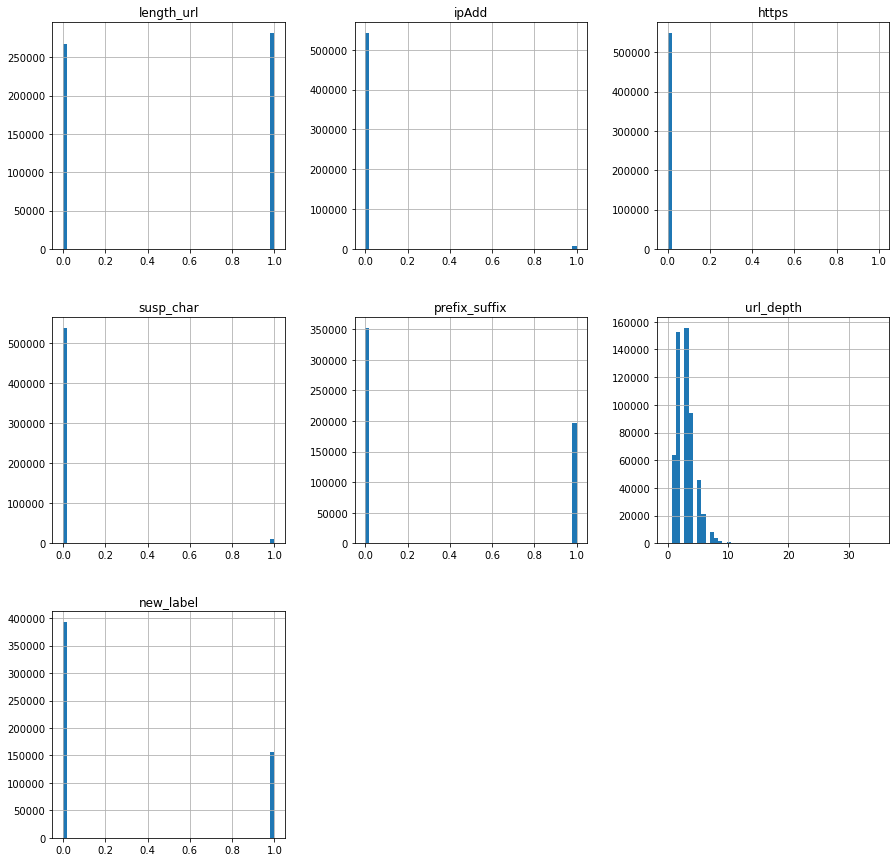

In [23]:
data.hist(bins = 50,figsize = (15,15))
plt.show()

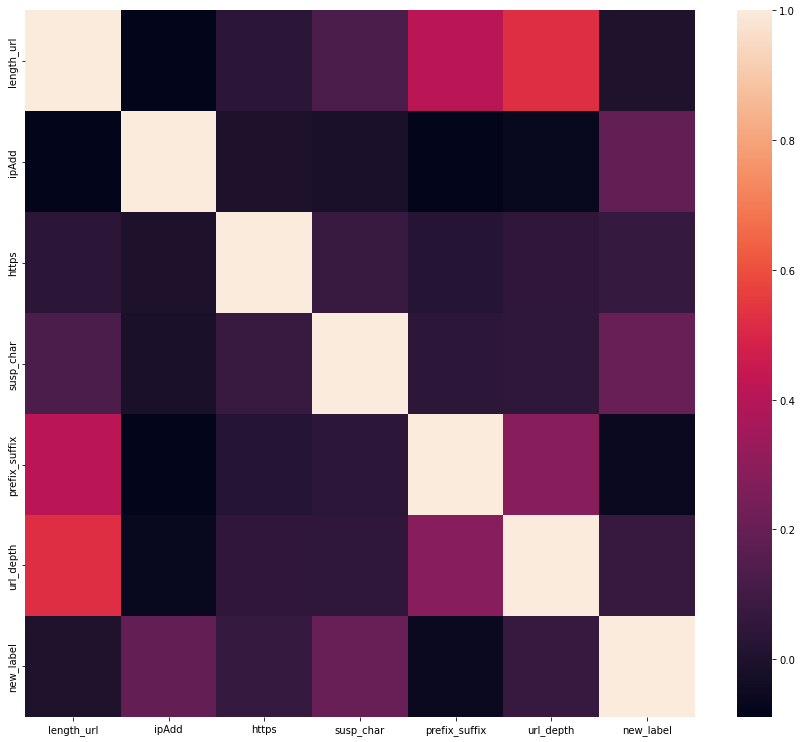

In [24]:
plt.figure(figsize=(15,13))
sns.heatmap(data.corr())
plt.show()

In [25]:
data.describe()

,length_url,ipAdd,https,susp_char,prefix_suffix,url_depth,new_label
count,549346.000000,549346.000000,549346.000000,549346.000000,549346.000000,549346.000000,549346.000000
mean,0.512395,0.014292,0.001744,0.018669,0.358222,3.094860,0.284742
std,0.499847,0.118690,0.041724,0.135355,0.479478,1.556039,0.451292
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,1.000000,4.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,1.000000


In [26]:
#checking the data for null or missing values
data.isnull().sum()

url              0
label            0
length_url       0
ipAdd            0
https            0
susp_char        0
prefix_suffix    0
url_depth        0
new_label        0
dtype: int64

In [27]:
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,url,label,length_url,ipAdd,https,susp_char,prefix_suffix,url_depth,new_label
0,ebookstore.sony.com/reader/,good,0,0,0,0,0,2,0
1,papertigers.org/wordpress/books-at-bedtime-inu...,good,1,0,0,0,1,3,0
2,thinkbabynames.com/meaning/1/Jack,good,0,0,0,0,0,4,0
3,chinatea.ro/43ftybb8,bad,0,0,0,0,0,2,1
4,anthonycarducci.lawyerpublicity.com/,bad,0,0,0,0,0,1,1


In [28]:
#importing packages
from sklearn.metrics import accuracy_score

In [29]:
struct_data = data.drop(columns=['url','label'],axis=1) # removing old url and label column to get the structured data

In [30]:
struct_data

,length_url,ipAdd,https,susp_char,prefix_suffix,url_depth,new_label
0,0,0,0,0,0,2,0
1,1,0,0,0,1,3,0
2,0,0,0,0,0,4,0
3,0,0,0,0,0,2,1
4,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...
549341,0,0,0,0,0,3,1
549342,1,0,0,0,0,3,1
549343,0,0,0,0,0,1,1
549344,0,0,0,0,0,2,0


In [31]:
X = struct_data.iloc[:,:-1] 
y = struct_data.iloc[:,[-1]]

In [32]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((439476, 6), (109870, 6))

In [33]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

In [34]:
# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [35]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

In [36]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.750
Decision Tree: Accuracy on test Data: 0.751


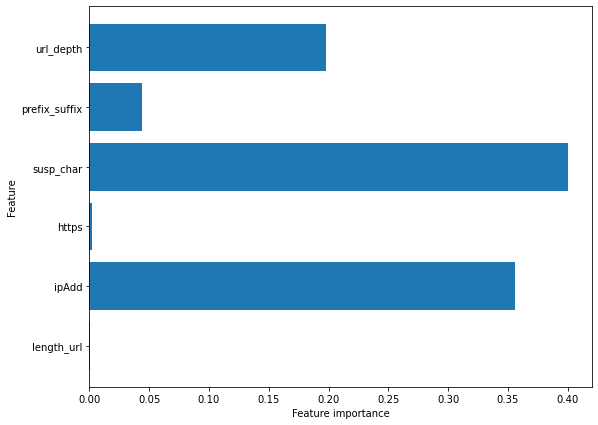

In [37]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [38]:
#XGBoost Classification model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
#fit the model
xgb.fit(X_train, y_train)

C:\Users\qgarn\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\qgarn\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[08:50:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.4, max_delta_step=0,
              max_depth=7, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [39]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

In [40]:
#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.751
XGBoost : Accuracy on test Data: 0.752
